# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()
sinasc.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


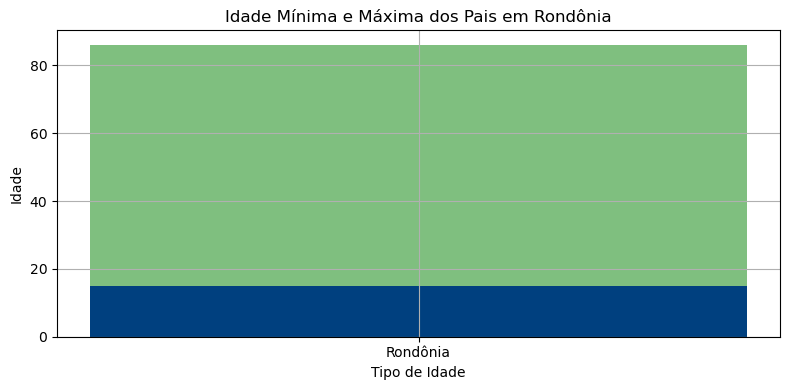

,min,max
munResUf,,
Rondônia,15.0,86.0


In [214]:


sinasc['IDADEPAI'].dropna()

sinasc.groupby('munResNome').agg({
    'IDADEMAE':'mean',
    'IDADEPAI':'mean'})

minpai = sinasc.groupby('munResUf')['IDADEPAI'].agg(['min','max'])
minmae = sinasc.groupby('munResUf')['IDADEMAE'].agg(['min','max'])

plt.figure(figsize=(8, 4))
plt.bar(minpai.index, minpai['min'], color='blue', label='Idade Mínima')
plt.bar(minpai.index, minpai['max'], color='green', label='Idade Máxima', alpha=0.5)

plt.title('Idade Mínima e Máxima dos Pais em Rondônia')
plt.xlabel('Tipo de Idade')
plt.ylabel('Idade')
plt.grid(True)
plt.tight_layout()
plt.show()



# Plotando as idades mínimas e máximas dos pais
minpai.head()

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [62]:
sinascfil = sinasc[sinasc['DTNASC'] == '2019-10-01']

sinascfil.groupby('ESCMAE')['PESO'].mean()



ESCMAE
12 anos ou mais    3136.173913
4 a 7 anos         3478.333333
8 a 11 anos        3222.803922
Name: PESO, dtype: float64

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [138]:
sinasc.columns


contagem = sinasc['munResNome'].value_counts(ascending=True)

munmenor = contagem.index[1]

filmu = sinasc[sinasc['munResNome'] == munmenor]

mae = filmu.groupby('munResNome')['IDADEMAE'].agg(['mean','max','min'])
pai = filmu.groupby('munResNome')['IDADEPAI'].agg(['mean','max','min'])


,mean,max,min
munResNome,,,
Castanheiras,27.28125,39,17


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [156]:

contagem = sinasc['munResNome'].value_counts(ascending=True)
contagem

munmais = contagem.index[-1]
munmais

filt = sinasc[sinasc['munResNome'] == munmais]

filt.groupby('munResNome')['QTDFILVIVO'].agg(['mean','max','min'])

filt.groupby('munResNome')['IDADEPAI'].agg(['mean','max','min'])


,mean,max,min
munResNome,,,
Porto Velho,32.352679,65.0,16.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

# Pela minha analise é certo dizer:
# 1 PONTO
# A analise sugere que a escolaridade da mãe pode influenciar o peso do bebê, com base na ideia de que mães com menor nível educacional podem ter menos acesso a boas oportunidades de emprego e, consequentemente, menos condições para uma alimentação adequada durante a gravidez.

# 2 PONTO
# Analisando a idade minina e maxima dos pais, vemos uma clara diferença entre homens e mulheres, a idade minima de uma mae é 11, e do pai é 15.
# a maxima idade da mae é 53 e do pai é 86.

In [48]:


sinasc.groupby('PARTO')['APGAR1'].mean()


PARTO
Cesáreo    8.132882
Vaginal    8.145145
Name: APGAR1, dtype: float64

In [43]:
gg = sinasc.groupby('GESTACAO')['APGAR1'].mean()

<Axes: xlabel='GESTACAO'>

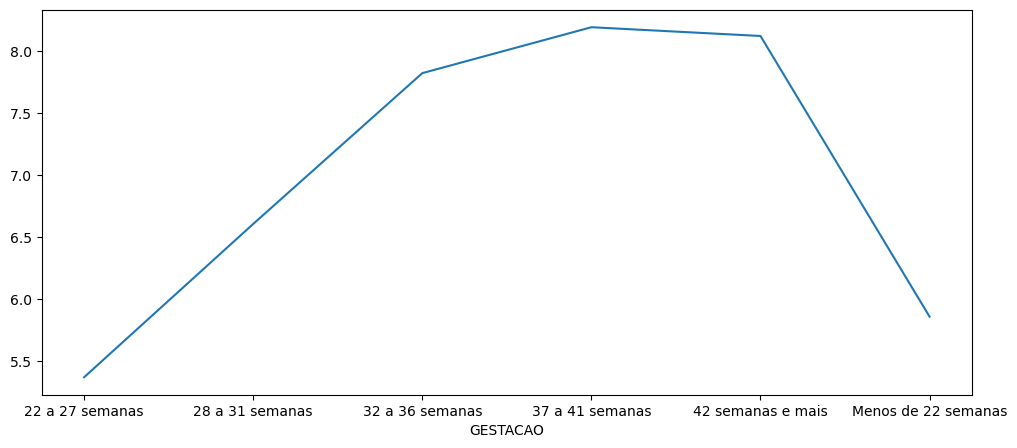

In [45]:
gg.plot(figsize=(12,5))

# 3 PONTO
# O APGAR1 é extremamente ligado com o tempo de gestação.

<Axes: xlabel='IDADEPAI'>

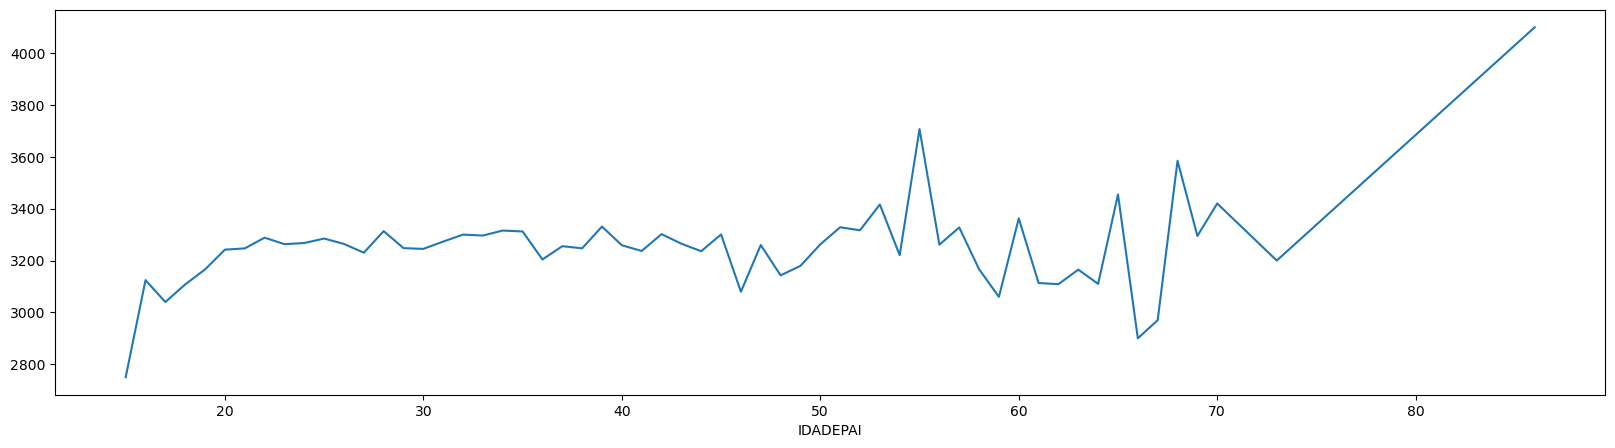

In [54]:
ID = sinasc.groupby('IDADEPAI')['PESO'].mean()
ID.plot(figsize=(20,5))

# PONTO 4 
# vejos uma diferença de peso em comparação com a idade do pai sendo um pouco mais dos 20 ate os 40, e acima disso os dados estao sem ordem.